
# Exploratory Data Analysis (EDA) for Diabetes Prediction Dataset

This notebook presents a structured Exploratory Data Analysis (EDA) of the diabetes prediction dataset.
The goal of this EDA is to understand the data's underlying patterns, relationships, and distributions,
with a specific focus on exploring factors that might contribute to diabetes.


# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Loading and Previewing the Dataset

In this section, we load the diabetes prediction dataset and preview its initial rows to get a general understanding of its structure.


In [3]:

# Load the dataset
data = pd.read_csv('diabetes_data.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1



## Basic Data Information

### Data Types and Missing Values
Here, we examine the data types of each feature and check for any missing values that need to be addressed.


In [4]:
# Check data types and missing values
print("Data Types and Missing Values:")
print(data.dtypes.astype(str) + " | Missing: " + data.isnull().sum().astype(str))


Data Types and Missing Values:
age                    int64 | Missing: 0
gender                object | Missing: 0
polyuria               int64 | Missing: 0
polydipsia             int64 | Missing: 0
sudden_weight_loss     int64 | Missing: 0
weakness               int64 | Missing: 0
polyphagia             int64 | Missing: 0
genital_thrush         int64 | Missing: 0
visual_blurring        int64 | Missing: 0
itching                int64 | Missing: 0
irritability           int64 | Missing: 0
delayed_healing        int64 | Missing: 0
partial_paresis        int64 | Missing: 0
muscle_stiffness       int64 | Missing: 0
alopecia               int64 | Missing: 0
obesity                int64 | Missing: 0
class                  int64 | Missing: 0
dtype: object



## Check for Duplicate Data

This step identifies any duplicate rows in the dataset, as they may affect the analysis and predictions.


In [5]:
# Checking for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display duplicate rows if any
if duplicate_count > 0:
    print("Duplicate rows:")
    display(data[data.duplicated()])

    # Removing duplicates
    data = data.drop_duplicates()


Number of duplicate rows: 269
Duplicate rows:


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
84,35,Female,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1
159,38,Female,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
160,28,Female,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
161,68,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
162,35,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0
497,47,Male,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
498,68,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1
499,64,Male,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0


## Check for Missing Values

Visualize missing values to identify patterns.

In [6]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:")
display(missing_values[missing_values > 0])

# Visualize missing data pattern if there are any
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Pattern")
    plt.show()


Missing Values per Column:


Series([], dtype: int64)


No Missing Data


## Descriptive Statistics

This section provides summary statistics for the numerical features in the dataset, giving insights into their distributions and ranges.


In [7]:

# Summary statistics for numerical features
data.describe()


,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,48.864542,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,12.526036,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



1. Age Distribution: The dataset has a wide age range (16-90) with a mean age of 49, centered around middle-aged individuals.

2. Common Symptoms: Polyuria, polydipsia, and weakness are more prevalent symptoms, each present in about half or more of the participants.

3. Less Common Symptoms: Genital thrush, obesity, and alopecia have lower frequencies, making them less common among participants.

4. Diabetes Class Imbalance: About 69% of the participants are diabetic, indicating a class imbalance that may need correction for modeling.

5. Binary Feature Spread: Most binary symptoms have a balanced distribution with standard deviations around 0.5, indicating variability in symptom presence.

6. Implications for Modeling: High-prevalence symptoms may serve as strong predictors. The class imbalance suggests a need for techniques like oversampling or undersampling to achieve balanced training data.


## Target Variable Distribution

Let's examine the distribution of the target variable, representing diabetes classification (`class`), to understand the balance between diabetic and non-diabetic individuals.


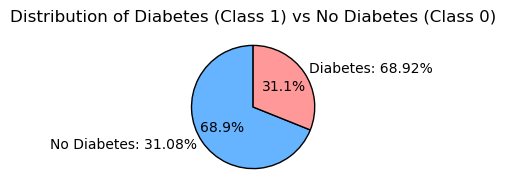

In [8]:

# Distribution of the target variable
# Count and percentage for the target variable
class_counts = data['class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Plotting a pie chart
plt.figure(figsize=(4, 2))
plt.pie(class_counts, labels=[f"No Diabetes: {class_percentages[0]:.2f}%", 
                              f"Diabetes: {class_percentages[1]:.2f}%"], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Diabetes (Class 1) vs No Diabetes (Class 0)')
plt.show()


Distribution of Diabetes (Class 1) vs No Diabetes (Class 0): The pie chart indicates that a higher percentage of the population represented in this dataset has diabetes (Class 1) at 68.9%, while 31.1% does not have diabetes (Class 0). This suggests that diabetes is prevalent in this sample group.


## Univariate Analysis

We analyze individual features, focusing on the distributions of age and gender.



### Age Distribution


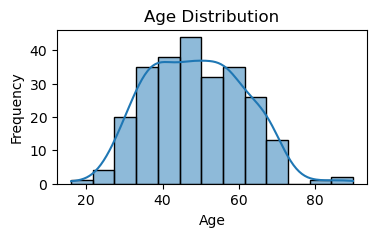

In [9]:

import seaborn as sns

# Age distribution plot
plt.figure(figsize=(4, 2))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Age Distribution: The histogram of age shows a roughly normal distribution, with the majority of individuals between ages 30 and 60. This suggests that the dataset mainly consists of middle-aged adults, with fewer young and older individuals.


### Gender Distribution


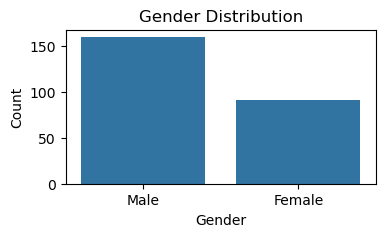

Gender Distribution:
Male: Count = 160, Percentage = 63.75%
Female: Count = 91, Percentage = 36.25%


In [10]:

# Bar plot for gender distribution
plt.figure(figsize=(4, 2))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Displaying counts and percentages
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: Count = {count}, Percentage = {gender_percentages[gender]:.2f}%")


Gender Distribution: The bar chart shows that males make up a larger portion of the dataset than females. This implies a potential gender imbalance, which may affect the analysis if gender-related trends are being studied.


## Bivariate Analysis

This section examines relationships between the target variable and individual features.



### Age Distribution by Diabetes Classification


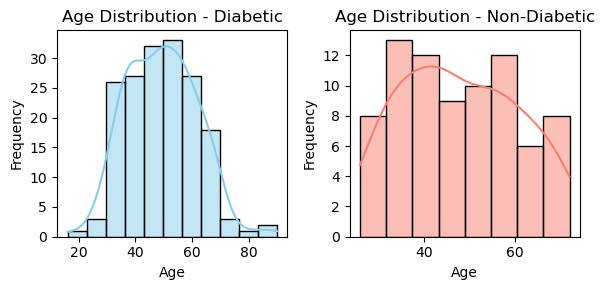

In [11]:

# Age distribution by diabetes classification
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

plt.figure(figsize=(6, 3))

# Diabetic individuals
plt.subplot(1, 2, 1)
sns.histplot(diabetic_data['age'], kde=True, color='skyblue')
plt.title("Age Distribution - Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Non-diabetic individuals
plt.subplot(1, 2, 2)
sns.histplot(non_diabetic_data['age'], kde=True, color='salmon')
plt.title("Age Distribution - Non-Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




1. Diabetic Age Group: Most diabetic cases are between ages 40 and 70, suggesting a higher prevalence in middle-aged to older adults.

2. Normal Distribution: Diabetic age distribution resembles a bell curve, indicating a central tendency in older age groups.

3. Non-Diabetic Spread: Non-diabetic cases are more evenly spread across ages, with peaks around 30, 50, and 60.

4. Age as a Risk Factor: Age likely influences diabetes risk, with older individuals at higher risk.

5. Modeling Insight: Age appears significant for predicting diabetes, given the distinct distributions between groups.

## Diebitic Class v/s Gender Distribution

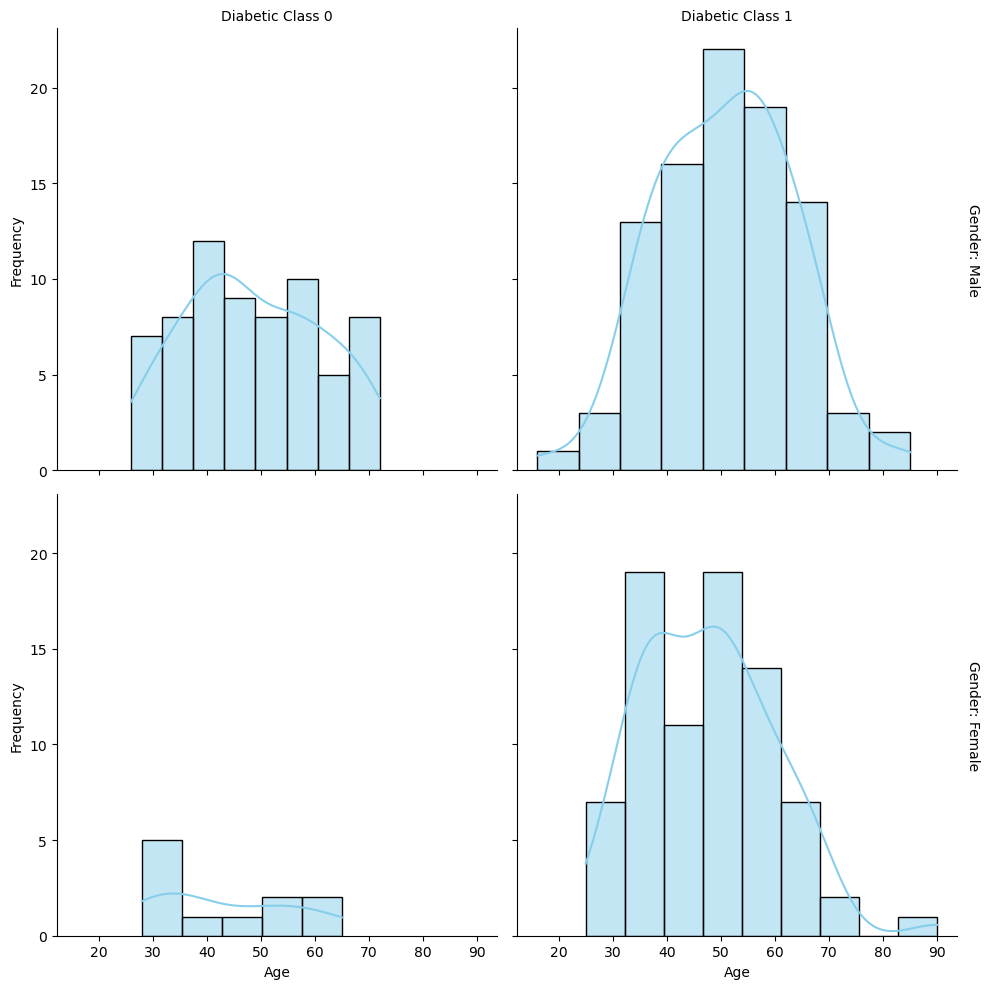

In [12]:

# Create a FacetGrid to explore multiple symptoms across 'class' and 'gender'
g = sns.FacetGrid(data, col='class', row='gender', margin_titles=True, height=5)

# Plot histograms for selected symptoms (e.g., 'polyuria', 'polydipsia', 'age') within each facet
g.map(sns.histplot, 'age', kde=True, color='skyblue')

# Add titles and labels
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='Diabetic Class {col_name}', row_template='Gender: {row_name}')

# Show the plot
plt.tight_layout()
plt.show()



Diabetes is more prevalent in middle-aged males (40-60) and females (30-60).

Screening efforts could focus on these age groups for early detection.


## Multivariate Analysis

We explore correlations between numerical features to identify any strong relationships.



### Correlation Matrix


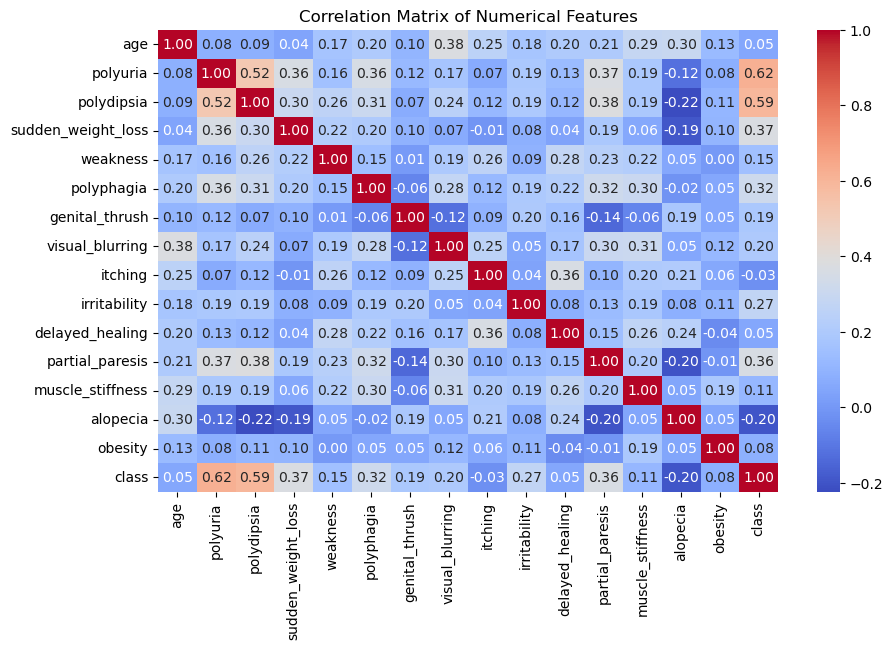

In [13]:

# Correlation matrix
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



From this correlation matrix of numerical features, here are the key observations:

1. Strong Correlation with Class (Target):
   - *Polyuria* and *Polydipsia* have the highest correlation with the class variable (0.62 and 0.59 respectively), suggesting these symptoms may be strong indicators of diabetes.

2. Moderate Correlation Among Symptoms:
   - *Polyuria* and *Polydipsia* are moderately correlated with each other (0.52), indicating these symptoms often occur together in diabetic individuals.
   - *Weakness* and *Sudden Weight Loss* show a moderate correlation (0.36), suggesting a relationship between these symptoms.

3. Low or No Correlation:
   - Many features, such as *Alopecia*, *Genital Thrush*, and *Muscle Stiffness*, show low correlation with the class variable and other features, implying they may have less predictive power.

4. Age:
   - Age shows very low correlation with most symptoms and the class variable, which might suggest age is not a strong predictor of diabetes in this dataset.




## Symptom Comparison Between Diabetic and Non-Diabetic Patients

This section presents a comparison of symptoms between diabetic and non-diabetic patients through side-by-side pie charts.


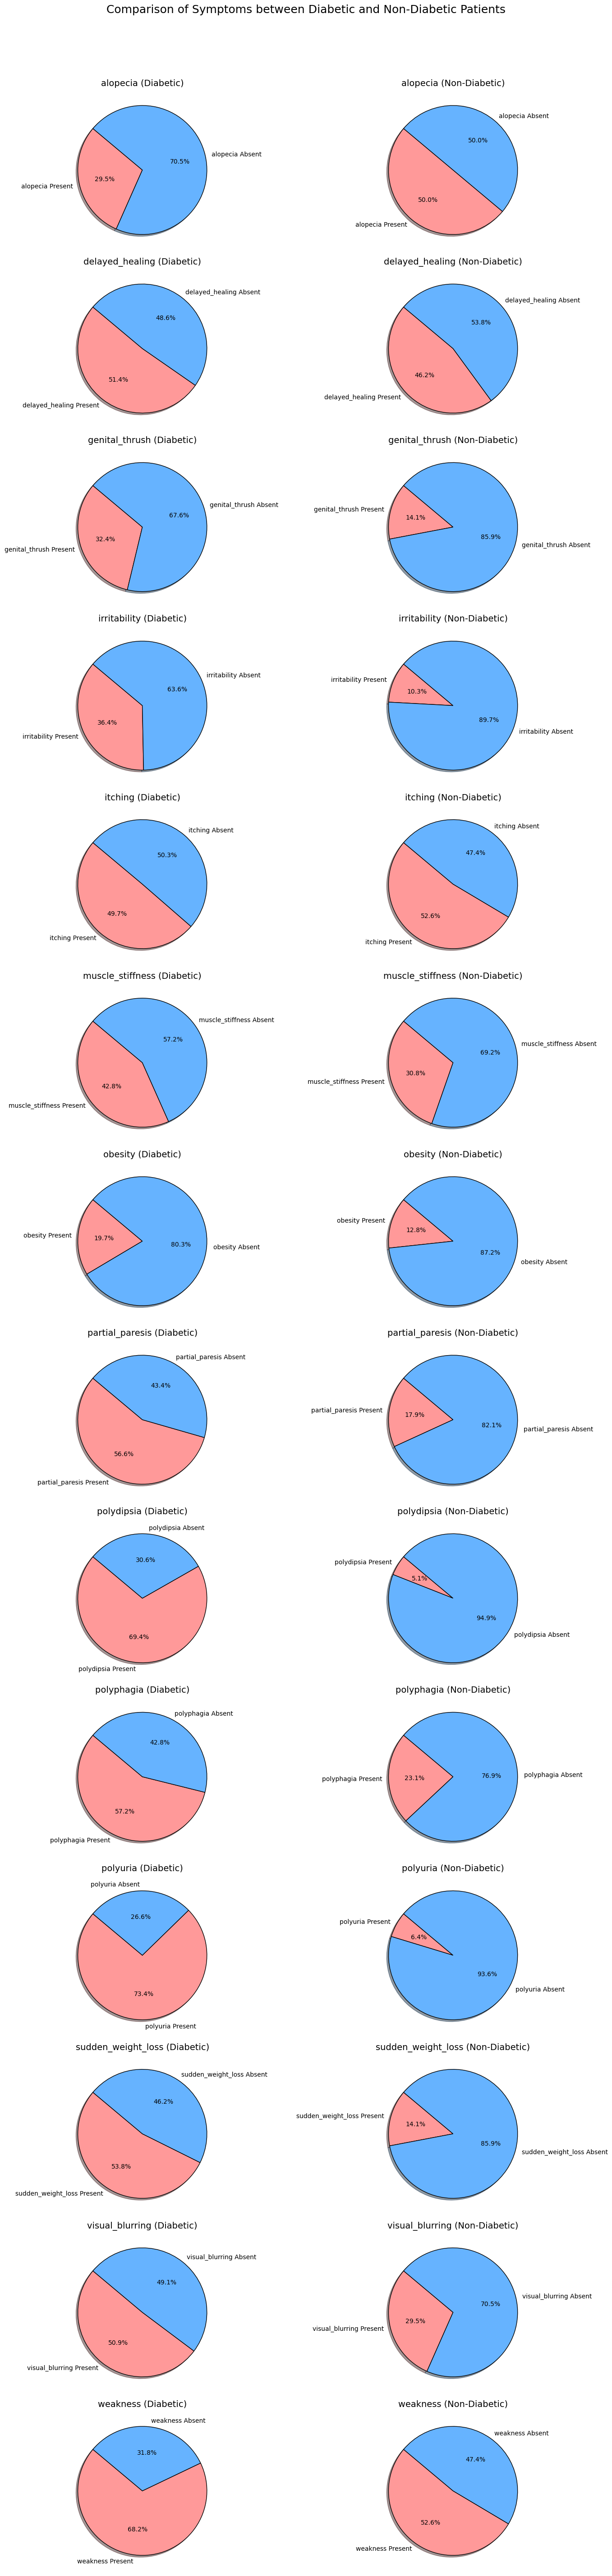

In [14]:

# Separate diabetic and non-diabetic data
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

# Calculate the total number of diabetic and non-diabetic patients
total_diabetic = len(diabetic_data)
total_non_diabetic = len(non_diabetic_data)

# Get all symptom columns (excluding age, gender, and class)
symptom_columns = data.columns.difference(['age', 'gender', 'class'])

# Set up the plotting layout
num_symptoms = len(symptom_columns)
fig, axes = plt.subplots(num_symptoms, 2, figsize=(14, num_symptoms * 4))
fig.suptitle("Comparison of Symptoms between Diabetic and Non-Diabetic Patients", y=1.02, fontsize=18)

# Generate side-by-side pie charts for each symptom
for i, symptom in enumerate(symptom_columns):
    # Calculate the counts for each symptom in both groups
    diabetic_count = diabetic_data[symptom].sum()
    non_diabetic_count = non_diabetic_data[symptom].sum()
    
    # Calculate the absence of the symptom in each group
    diabetic_no_symptom = total_diabetic - diabetic_count
    non_diabetic_no_symptom = total_non_diabetic - non_diabetic_count
    
    # Prepare data for pie charts
    diabetic_counts = [diabetic_count, diabetic_no_symptom]
    non_diabetic_counts = [non_diabetic_count, non_diabetic_no_symptom]
    
    # Define labels and colors
    labels = [f'{symptom} Present', f'{symptom} Absent']
    colors = ['#ff9999','#66b3ff']
    
    # Diabetic patients pie chart
    wedges1, texts1, autotexts1 = axes[i, 0].pie(diabetic_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, wedgeprops={"edgecolor": "black"})
    axes[i, 0].set_title(f"{symptom} (Diabetic)", fontsize=14)

    # Non-diabetic patients pie chart
    wedges2, texts2, autotexts2 = axes[i, 1].pie(non_diabetic_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, wedgeprops={"edgecolor": "black"})
    axes[i, 1].set_title(f"{symptom} (Non-Diabetic)", fontsize=14)

# Adjust layout to prevent overlapping of titles and legends
plt.tight_layout()
plt.show()


1. Alopecia and Itching are more common in non-diabetic patients.

2. Delayed Healing, Genital Thrush, Irritability, Muscle Stiffness, Obesity, Partial Paresis, Polyuria, Sudden Weight Loss, Visual Blurring, and Weakness are more common in diabetic patients.


## Radar Plot for Symptom Comparison

The radar plot compares the presence of each symptom between diabetic and non-diabetic patients, providing an overview of common symptoms in each group.


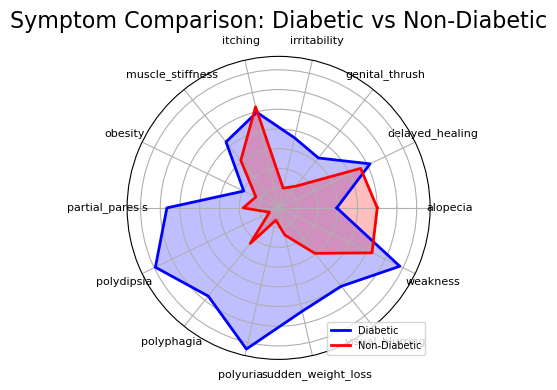

In [15]:

# List of symptom columns
symptom_columns = data.columns.difference(['age', 'gender', 'class'])

# Aggregate the data by calculating the mean for each symptom (percentage of people with the symptom)
diabetic_symptom_data = data[data['class'] == 1][symptom_columns].mean()
non_diabetic_symptom_data = data[data['class'] == 0][symptom_columns].mean()

# Function to create a radar plot
def radar_plot(data1, data2, categories, title='Radar Plot'):
    # Number of variables (symptoms)
    num_vars = len(categories)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is circular, so the first point is repeated to close the circle
    data1 = data1.tolist()
    data2 = data2.tolist()
    data1.append(data1[0])
    data2.append(data2[0])
    angles.append(angles[0])

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(7, 4), subplot_kw=dict(polar=True))

    # Plot data for Diabetic individuals
    ax.plot(angles, data1, color='blue', linewidth=2, label='Diabetic', linestyle='solid')
    ax.fill(angles, data1, color='blue', alpha=0.25)

    # Plot data for Non-Diabetic individuals
    ax.plot(angles, data2, color='red', linewidth=2, label='Non-Diabetic', linestyle='solid')
    ax.fill(angles, data2, color='red', alpha=0.25)

    # Set the labels and title
    ax.set_yticklabels([])  # Hide radial ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, rotation=45, fontsize=8)
    ax.set_title(title, fontsize=16)
    
    # Add a legend
    plt.legend(loc='lower right', fontsize=7)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Create Radar Plot comparing diabetic and non-diabetic individuals
radar_plot(diabetic_symptom_data, non_diabetic_symptom_data, symptom_columns, title='Symptom Comparison: Diabetic vs Non-Diabetic')




From this radar chart comparing symptoms in diabetic and non-diabetic individuals, here are the main observations:

1. Higher Symptom Prevalence in Diabetics:
   - Diabetic individuals (blue) show higher values across most symptoms compared to non-diabetics (red), particularly in symptoms like *polyuria*, *polydipsia*, and *sudden weight loss*. This aligns with common indicators of diabetes.

2. Distinctive Symptoms:
   - Symptoms such as *polyuria*, *polydipsia*, and *weakness* are significantly more pronounced in diabetics than non-diabetics, suggesting these symptoms are strong markers for diabetes.

3. Less Distinctive Symptoms:
   - Symptoms like *alopecia*, *muscle stiffness*, and *partial paresis* show less difference between diabetic and non-diabetic groups, indicating these may be less useful in distinguishing between the two.

4. Useful Visual for Classification:
   - This comparison highlights which symptoms could serve as effective features for predicting diabetes, with stronger differences in symptom prevalence likely contributing more to accurate classification. 

This radar chart is a helpful visual in identifying and prioritizing features for diabetes prediction.


## Permutation Feature Importance

Permutation feature importance scores are calculated for the symptoms, indicating their predictive power in the diabetes prediction model.


C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\1972362445.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Symptom', data=perm_importance_df, palette="viridis")


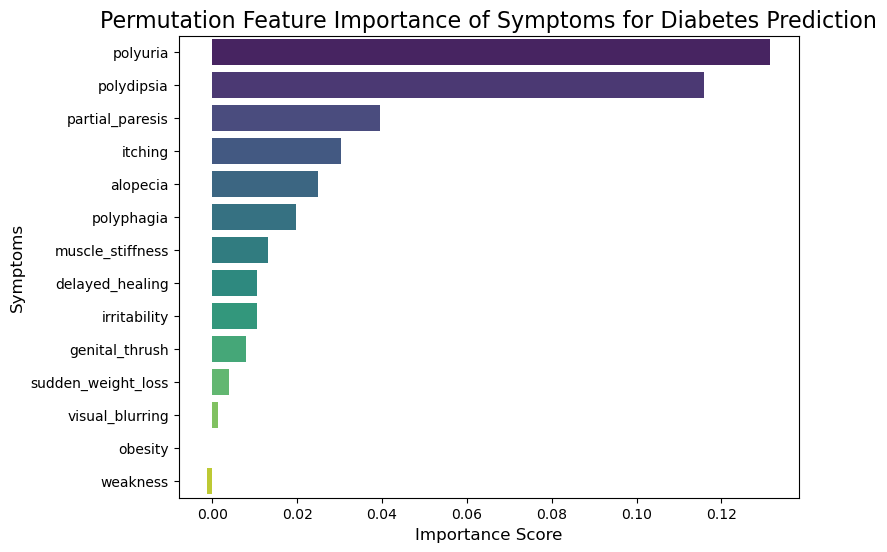

In [16]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Assuming data has been split into features and target
X = data[symptom_columns]  # Select symptom columns as features
y = data['class']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get permutation feature importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for easier plotting
perm_importance_df = pd.DataFrame({
    'Symptom': symptom_columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance score in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot the permutation feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Symptom', data=perm_importance_df, palette="viridis")
plt.title("Permutation Feature Importance of Symptoms for Diabetes Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.show()


1. High Importance Symptoms: "Polyuria" and "polydipsia" have the highest importance scores, indicating they are strong indicators for diabetes in this model.

2. Moderate Importance Symptoms: "Partial paresis," "itching," "alopecia," and "polyphagia" (excessive hunger) are also relevant but less impactful than the top two symptoms.

3. Low Importance Symptoms: Symptoms like "obesity," "weakness," "visual blurring," and "sudden weight loss" contribute minimally to diabetes prediction.

4. Interpretation: The model suggests that symptoms related to excessive urination and thirst are the most critical for diabetes prediction, while others play a smaller role.

# Heatmap of Important Features

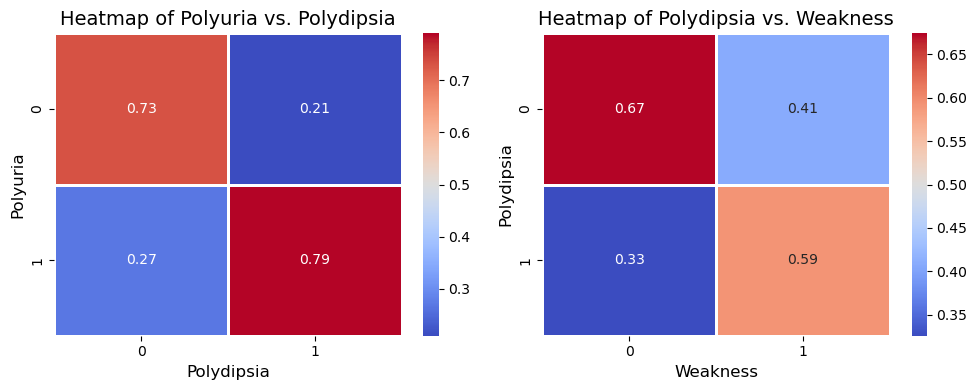

In [17]:

# Assuming `data` is your DataFrame and has the columns `polyuria`, `polydipsia`, and `weakness`

# Create crosstab matrices for polyuria vs. polydipsia and polydipsia vs. weakness
polyuria_polydipsia_corr = pd.crosstab(data['polyuria'], data['polydipsia'], normalize='columns')
polydipsia_weakness_corr = pd.crosstab(data['polydipsia'], data['weakness'], normalize='columns')

# Set up the subplot grid
plt.figure(figsize=(10, 4))

# Plot Heatmap for polyuria vs. polydipsia
plt.subplot(1, 2, 1)
sns.heatmap(polyuria_polydipsia_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Heatmap of Polyuria vs. Polydipsia', fontsize=14)
plt.xlabel('Polydipsia', fontsize=12)
plt.ylabel('Polyuria', fontsize=12)

# Plot Heatmap for polydipsia vs. weakness
plt.subplot(1, 2, 2)
sns.heatmap(polydipsia_weakness_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Heatmap of Polydipsia vs. Weakness', fontsize=14)
plt.xlabel('Weakness', fontsize=12)
plt.ylabel('Polydipsia', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()




The strong correlation between polyuria and polydipsia supports their high feature importance scores in predicting diabetes.

Weakness shows a weaker correlation with polydipsia, which aligns with its lower importance score in the earlier feature importance analysis.

These heatmaps help in identifying symptom patterns and can guide further clinical assessments or feature engineering for predictive models.


## Conclusions

This EDA provided insights into the distributions of features and highlighted potential relationships between them. Age and gender appear to vary by diabetes status, and certain features show moderate correlations, which may assist in further predictive modeling.


# Next Steps:

1. I will start by experimenting with Logistic Regression for baseline performance.

2. Then, I'll compare it against more complex models like Random Forest and XGBoost to see if they offer a significant performance boost.

3. The model with the best performance metrics (accuracy, precision, recall, F1-score) on the validation set will be selected for final deployment.

# Model Training  / Model Selection

## Remove Duplicates

In [18]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'diabetes_data.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows and column information for analysis
diabetes_data_info = diabetes_data.info()
diabetes_data_head = diabetes_data.head()

diabetes_data_info, diabetes_data_head

# Assuming your dataframe is named 'diabetes_data'
diabetes_data = diabetes_data.drop_duplicates()

# Verify that duplicates have been removed
print(f"Dataset shape after removing duplicates: {diabetes_data.shape}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                             --------------  ----- 
 0   age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class  520 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
Dataset shape after removing duplicates: (251, 1)


## Importing Libraries

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, log_loss, matthews_corrcoef, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB




## Column Correction

In [20]:
# Splitting the single column into individual features based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class']\
    .str.split(';', expand=True)

# Renaming columns based on the original dataset structure
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Converting data types where appropriate
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Displaying a summary of the cleaned data
diabetes_data_cleaned_info = diabetes_data_cleaned.info()
diabetes_data_cleaned_head = diabetes_data_cleaned.head()

diabetes_data_cleaned_info, diabetes_data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden_weight_loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital_thrush      251 non-null    object
 8   visual_blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed_healing     251 non-null    object
 12  partial_paresis     251 non-null    object
 13  muscle_stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 non-nul

(None,
    age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
 0   40   Male        0          1                  0        1          0   
 1   58   Male        0          0                  0        1          0   
 2   41   Male        1          0                  0        1          1   
 3   45   Male        0          0                  1        1          1   
 4   60   Male        1          1                  1        1          1   
 
   genital_thrush visual_blurring itching irritability delayed_healing  \
 0              0               0       1            0               1   
 1              0               1       0            0               0   
 2              0               0       1            0               1   
 3              1               0       1            0               1   
 4              0               1       1            1               1   
 
   partial_paresis muscle_stiffness alopecia obesity  class  
 0               0   

## Pre-Processing DATA

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, matthews_corrcoef, roc_curve, auc, classification_report

# Load and preprocess the dataset
data = 'diabetes_data.csv'  # Replace with your file path
diabetes_data = pd.read_csv(data)

# Clean the data if needed
diabetes_data_cleaned = diabetes_data.iloc[:, 0].str.split(';', expand=True)
columns = [
    "age", "gender", "polyuria", "polydipsia", "sudden_weight_loss", "weakness", 
    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", 
    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity", 
    "class"
]
diabetes_data_cleaned.columns = columns

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'class']:
    le = LabelEncoder()
    diabetes_data_cleaned[column] = le.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = le

# Separate features and target
X = diabetes_data_cleaned.drop(columns=["class"])
y = diabetes_data_cleaned["class"]

# Normalize numerical features
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])


## PCA

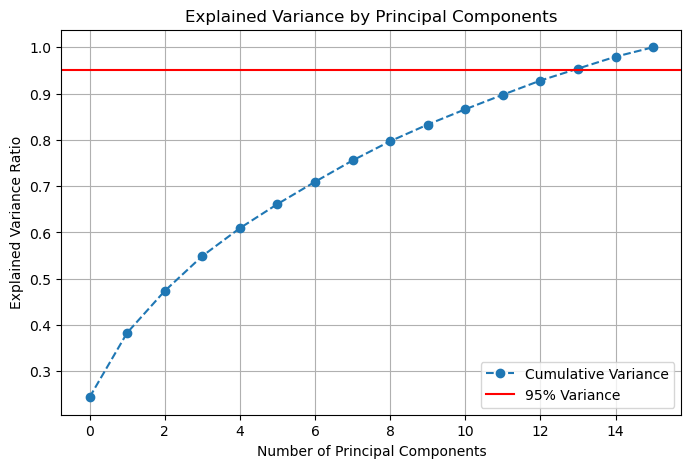

Number of components to retain 95% variance: 14

Explained Variance by Component:
Principal Component 1: 0.2442
Principal Component 2: 0.1392
Principal Component 3: 0.0903
Principal Component 4: 0.0754
Principal Component 5: 0.0602
Principal Component 6: 0.0520
Principal Component 7: 0.0481
Principal Component 8: 0.0461
Principal Component 9: 0.0415
Principal Component 10: 0.0360
Principal Component 11: 0.0330
Principal Component 12: 0.0315

Top contributing features to the first 12 principal components:
                         PC1       PC2       PC3       PC4       PC5  \
age                 0.247639  0.332163 -0.037396  0.268348 -0.139031   
gender             -0.210226  0.314712  0.183609  0.209758 -0.142707   
polyuria            0.341376 -0.176358  0.276735 -0.037978 -0.085701   
polydipsia          0.347392 -0.234118  0.162873 -0.070116  0.058947   
sudden_weight_loss  0.252097 -0.225500  0.352508 -0.072283  0.224008   
weakness            0.286994  0.124274  0.021332 -0.222908

In [22]:
diabetes_data = pd.read_csv('diabetes_data.csv')

# Split the single column if needed (adjust column splitting as necessary)
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class'] \
    .str.split(';', expand=True)

# Rename the columns
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Convert data types
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['gender'] = diabetes_data_cleaned['gender'].map({'Male': 1, 'Female': 0})
binary_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
    'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]
diabetes_data_cleaned[binary_columns] = diabetes_data_cleaned[binary_columns].astype(int)
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Separate features and target
features = diabetes_data_cleaned.drop(columns=['class'])
target = diabetes_data_cleaned['class']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

# Determine the number of components for 95% variance
num_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

# Display explained variance for each component
print("\nExplained Variance by Component:")
for i, variance in enumerate(explained_variance_ratio[:12]):
    print(f"Principal Component {i + 1}: {variance:.4f}")

# Display the top contributing features to the first 12 principal components
pca_optimal = PCA(n_components=12)
features_reduced = pca_optimal.fit_transform(features_scaled)

# Get the component loadings (contributions of original features)
loadings = pca_optimal.components_

# Create a DataFrame for easy visualization
feature_names = features.columns
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(12)])

print("\nTop contributing features to the first 12 principal components:")
print(loadings_df)

# Optionally, to see the absolute contributions and sort them
for i in range(12):
    print(f"\nTop features contributing to PC{i+1}:")
    top_features = loadings_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5)
    print(top_features)


<span style="color: #A5D6A7;">

 ### WHY PCA IS NOT REQUIRED
1. Categorical Features: PCA is not suitable for categorical data unless it's properly encoded (e.g., one-hot encoding or label encoding).

2. Linear Assumption: PCA assumes linear relationships between features, so it may not perform well if your data has non-linear relationships.

3. Variance Preservation: PCA focuses on maximizing variance, which might lead to the loss of important features for classification if they do not exhibit high variance.

4. Scaling Sensitivity: PCA is sensitive to the scale of features, so you need to standardize or normalize your data to ensure fair comparison across features.

</span>

## Logistic Regression model

LOGISTIC REGRESSION MODEL PERFORMANCE METRICS
Accuracy: 0.93
ROC-AUC Score: 0.99
Log Loss: 0.17
Matthews Correlation Coefficient (MCC): 0.87
Specificity: 0.97
Confusion Matrix:
[[39  1]
 [ 6 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.98      0.91      0.94        64

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



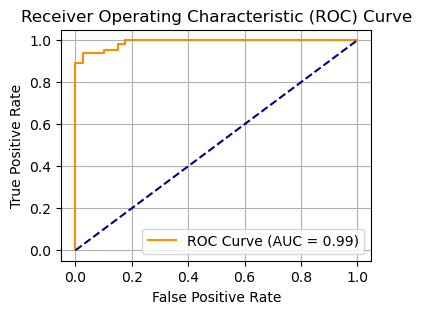

In [23]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the logistic regression model with hyperparameters
logistic_model = LogisticRegression(
    penalty='l2',           # Using L2 regularization
    C=1.0,                  # Default regularization strength
    solver='lbfgs',         # Solver for optimization
    max_iter=200,           # Allowing more iterations for convergence
    class_weight='balanced' # Adjusting for class imbalance
)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Compute metrics
conf_matrix = confusion_matrix(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Display metrics
accuracy = logistic_model.score(X_test, y_test)
classification_rep = classification_report(y_test, y_pred)

print("LOGISTIC REGRESSION MODEL PERFORMANCE METRICS")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc_value:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"Specificity: {specificity:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_value:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Key Hyperparameters in Use for Logistic Regression:

1. **penalty='l2'**: Uses L2 regularization to prevent overfitting by penalizing large coefficients.

2. **C=1.0**: Default regularization strength, balancing the bias-variance tradeoff.

3. **solver='lbfgs'**: Efficient solver for L2 regularization, suitable for small-to-medium datasets.

4. **max_iter=200**: Ensures the model has enough iterations to converge.

5. **class_weight='balanced'**: Handles class imbalance by assigning weights inversely proportional to class frequencies.


## Support Vector Machine (SVM)

SVM Tuned Accuracy: 0.97
SVM Tuned ROC-AUC: 1.00
SVM Log Loss: 0.05
SVM Matthews Correlation Coefficient (MCC): 0.94
SVM Specificity: 1.00
Confusion Matrix:
[[40  0]
 [ 3 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



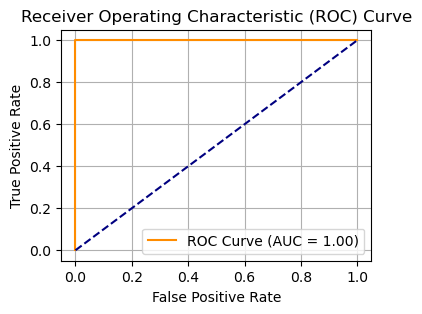

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, log_loss, matthews_corrcoef, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Create the SVM model with probability=True
best_svm_model = SVC(
    C=1.0,                       # Regularization parameter
    kernel='rbf',                 # Kernel type (RBF is commonly used)
    gamma='scale',                # Gamma parameter (scale is a common value)
    class_weight='balanced',      # Handle class imbalance
    decision_function_shape='ovr', # One-vs-Rest approach for multi-class
    tol=1e-3,                     # Stopping criteria tolerance
    max_iter=-1,                  # No maximum iterations
    shrinking=True,               # Use shrinking heuristic
    probability=True              # Enable probability estimates
)

# Train the model
best_svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = best_svm_model.predict(X_test)
svm_pred_proba = best_svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Accuracy and ROC-AUC score
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_pred_proba)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Log Loss
svm_log_loss = log_loss(y_test, svm_pred_proba)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, svm_predictions)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# ROC curve data for plotting
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Display metrics
print(f"SVM Tuned Accuracy: {svm_accuracy:.2f}")
print(f"SVM Tuned ROC-AUC: {svm_roc_auc:.2f}")
print(f"SVM Log Loss: {svm_log_loss:.2f}")
print(f"SVM Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"SVM Specificity: {specificity:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_value:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Explanation of Hyperparameters for Support Vector Machine (SVM):

1. **C=1.0**: The regularization parameter. Controls the trade-off between achieving a low error on the training set and minimizing the model complexity.

2. **kernel='rbf'**: Radial Basis Function (RBF) kernel is typically used for non-linear decision boundaries. It transforms the input space into a higher-dimensional space.

3. **gamma='scale'**: The coefficient for the kernel function. With `gamma='scale'`, it is automatically set to 1 / (n_features * X.var()), which is a commonly used value.

4. **class_weight='balanced'**: This helps deal with imbalanced class distributions by adjusting the weight of each class inversely proportional to its frequency in the dataset.

5. **decision_function_shape='ovr'**: This parameter is used for multi-class classification. 'ovr' (One-vs-Rest) builds a binary classifier for each class.

6. **tol=1e-3**: The tolerance for stopping criteria. If the optimization does not improve beyond this threshold, the algorithm will stop.

7. **max_iter=-1**: There is no maximum iteration by default. The optimization process will run until convergence or until it reaches the stopping criteria.

8. **shrinking=True**: Enables the shrinking heuristic to speed up the training of the SVM model by discarding certain support vectors early on.


## Naive Bayes

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Naive Bayes Accuracy: 0.94
Naive Bayes ROC-AUC: 0.99
Naive Bayes Log Loss: 0.20
Naive Bayes MCC: 0.88
Naive Bayes Specificity: 0.95
Naive Bayes Confusion Matrix:
 [[38  2]
 [ 4 60]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



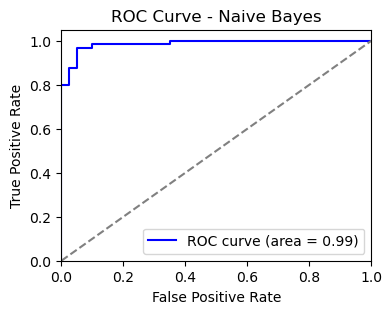

In [25]:

# Define the Naive Bayes model
nb_model = GaussianNB()  # You can switch between GaussianNB, MultinomialNB, or BernoulliNB

# Define hyperparameters for GaussianNB
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Define hyperparameters for MultinomialNB
# Here, alpha is a smoothing parameter for multinomial distribution
# fit_prior is used for adjusting class priors
multinomial_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Define hyperparameters for BernoulliNB
# Similar to MultinomialNB but used for binary/boolean features
bernoulli_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# You can use a different Naive Bayes model by switching the `nb_model`
# GridSearchCV for tuning the model's hyperparameters
if isinstance(nb_model, GaussianNB):
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
elif isinstance(nb_model, MultinomialNB):
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=multinomial_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
elif isinstance(nb_model, BernoulliNB):
    nb_grid = GridSearchCV(estimator=nb_model, param_grid=bernoulli_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search
nb_grid.fit(X_train, y_train)

# Best model evaluation
best_nb_model = nb_grid.best_estimator_
nb_predictions = best_nb_model.predict(X_test)
nb_proba = best_nb_model.predict_proba(X_test)[:, 1]

# Metrics
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_roc_auc = roc_auc_score(y_test, nb_proba)
nb_log_loss = log_loss(y_test, nb_proba)
nb_mcc = matthews_corrcoef(y_test, nb_predictions)
nb_specificity = recall_score(y_test, nb_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Classification report
nb_class_report = classification_report(y_test, nb_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, nb_proba)
roc_auc = auc(fpr, tpr)

# Output metrics
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes ROC-AUC: {nb_roc_auc:.2f}")
print(f"Naive Bayes Log Loss: {nb_log_loss:.2f}")
print(f"Naive Bayes MCC: {nb_mcc:.2f}")
print(f"Naive Bayes Specificity: {nb_specificity:.2f}")
print("Naive Bayes Confusion Matrix:\n", conf_matrix)
print("Naive Bayes Classification Report:\n", nb_class_report)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters Used in Naive Bayes Models:

1. **var_smoothing** (for **GaussianNB**): Regularization parameter to avoid zero variance by adding a small value to the variance of each feature.

2. **alpha** (for **MultinomialNB** and **BernoulliNB**): Smoothing parameter to avoid zero probabilities by adding a small value to all feature counts.

3. **fit_prior** (for **MultinomialNB** and **BernoulliNB**): Determines whether to learn class prior probabilities from the data or use uniform priors.


## k-Nearest Neighbors (k-NN)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


c:\Users\2004a\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


k-NN Accuracy: 0.94
k-NN ROC-AUC: 0.98
k-NN Log Loss: 0.76
k-NN MCC: 0.88
k-NN Specificity: 0.97
k-NN Confusion Matrix:
 [[39  1]
 [ 5 59]]
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



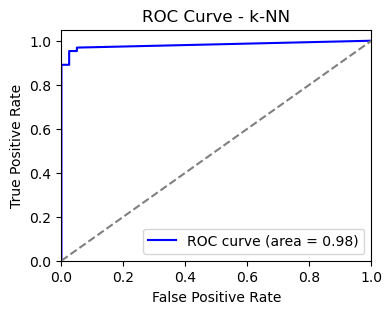

In [26]:
# Define the k-NN model
knn_model = KNeighborsClassifier()

# Define hyperparameters
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

# GridSearchCV for tuning
knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
knn_grid.fit(X_train, y_train)

# Best model evaluation
best_knn_model = knn_grid.best_estimator_
knn_predictions = best_knn_model.predict(X_test)
knn_proba = best_knn_model.predict_proba(X_test)[:, 1]

# Metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_proba)
knn_log_loss = log_loss(y_test, knn_proba)
knn_mcc = matthews_corrcoef(y_test, knn_predictions)
knn_specificity = recall_score(y_test, knn_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Classification report
knn_class_report = classification_report(y_test, knn_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, knn_proba)
roc_auc = auc(fpr, tpr)



# Output metrics
print(f"k-NN Accuracy: {knn_accuracy:.2f}")
print(f"k-NN ROC-AUC: {knn_roc_auc:.2f}")
print(f"k-NN Log Loss: {knn_log_loss:.2f}")
print(f"k-NN MCC: {knn_mcc:.2f}")
print(f"k-NN Specificity: {knn_specificity:.2f}")
print("k-NN Confusion Matrix:\n", conf_matrix)
print("k-NN Classification Report:\n", knn_class_report)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-NN')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters Used in K-Nearest Neighbors (KNN):

1. **n_neighbors**: The number of neighbors to consider when making a prediction; larger values make the model smoother.

2. **weights**: Determines the weighting of the neighbors; 'uniform' gives equal weight to all neighbors, and 'distance' gives closer neighbors more influence.

3. **metric**: The distance metric to use for calculating neighbor distances; options include:
   - **'euclidean'**: Standard straight-line distance.
   - **'manhattan'**: Distance based on the sum of absolute differences.
   - **'minkowski'**: A generalization of both Euclidean and Manhattan distances.

4. **leaf_size**: The leaf size in the k-d tree algorithm; affects performance and memory usage.

5. **p**: The power parameter for the Minkowski distance; p=1 corresponds to Manhattan distance, and p=2 corresponds to Euclidean distance.


## Decision Tree Classifier

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Decision Tree Accuracy: 0.94
Decision Tree ROC-AUC: 0.99
Decision Tree Log Loss: 0.14
Decision Tree MCC: 0.88
Decision Tree Specificity: 0.97
Decision Tree Confusion Matrix:
 [[39  1]
 [ 5 59]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



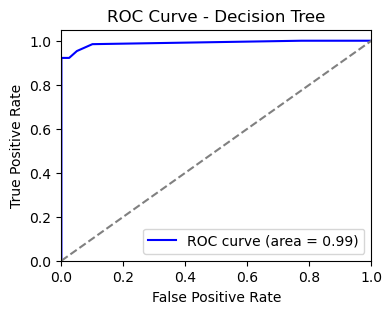

In [27]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters
dt_params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for tuning
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
dt_grid.fit(X_train, y_train)

# Best model evaluation
best_dt_model = dt_grid.best_estimator_
dt_predictions = best_dt_model.predict(X_test)
dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_proba)
dt_log_loss = log_loss(y_test, dt_proba)
dt_mcc = matthews_corrcoef(y_test, dt_predictions)
dt_specificity = recall_score(y_test, dt_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Classification report
dt_class_report = classification_report(y_test, dt_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt_proba)
roc_auc = auc(fpr, tpr)



# Output metrics
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Decision Tree ROC-AUC: {dt_roc_auc:.2f}")
print(f"Decision Tree Log Loss: {dt_log_loss:.2f}")
print(f"Decision Tree MCC: {dt_mcc:.2f}")
print(f"Decision Tree Specificity: {dt_specificity:.2f}")
print("Decision Tree Confusion Matrix:\n", conf_matrix)
print("Decision Tree Classification Report:\n", dt_class_report)
# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Decision Tree (DT):

1. **max_depth**: The maximum depth of the tree; controls the maximum number of splits from the root to the leaves. Deeper trees can lead to overfitting.

2. **min_samples_split**: The minimum number of samples required to split an internal node; higher values prevent the model from learning overly specific patterns (overfitting).

3. **min_samples_leaf**: The minimum number of samples required to be at a leaf node; helps in smoothing the model and reducing overfitting.

4. **criterion**: The function to measure the quality of a split:
   - **'gini'**: Uses the Gini impurity.
   - **'entropy'**: Uses information gain (entropy) as the split criterion.


## Random Forest Classifier

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Accuracy: 0.99
Random Forest ROC-AUC: 1.00
Random Forest Log Loss: 0.08
Random Forest MCC: 0.98
Random Forest Specificity: 1.00
Random Forest Confusion Matrix:
 [[40  0]
 [ 1 63]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



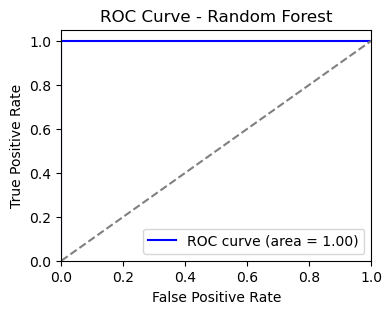

In [28]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for tuning
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

# Best model evaluation
best_rf_model = rf_grid.best_estimator_
rf_predictions = best_rf_model.predict(X_test)
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_proba)
rf_log_loss = log_loss(y_test, rf_proba)
rf_mcc = matthews_corrcoef(y_test, rf_predictions)
rf_specificity = recall_score(y_test, rf_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Classification report
rf_class_report = classification_report(y_test, rf_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_proba)
roc_auc = auc(fpr, tpr)


# Output metrics
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.2f}")
print(f"Random Forest Log Loss: {rf_log_loss:.2f}")
print(f"Random Forest MCC: {rf_mcc:.2f}")
print(f"Random Forest Specificity: {rf_specificity:.2f}")
print("Random Forest Confusion Matrix:\n", conf_matrix)
print("Random Forest Classification Report:\n", rf_class_report)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Random Forest (RF):

1. **n_estimators**: The number of trees in the forest. More trees can improve performance but also increase computation time.

2. **max_depth**: The maximum depth of the tree; controls the number of splits from the root to the leaves. Deeper trees may lead to overfitting.

3. **min_samples_split**: The minimum number of samples required to split an internal node. Higher values help prevent overfitting by making the model less sensitive to noise.

4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. It ensures that leaf nodes contain a sufficient number of samples to make more general predictions, reducing overfitting.


## Neural Network

Fitting 3 folds for each of 36 candidates, totalling 108 fits
MLP Accuracy: 0.97
MLP ROC-AUC: 1.00
MLP Log Loss: 0.05
MLP MCC: 0.94
MLP Specificity: 1.00
MLP Confusion Matrix:
 [[40  0]
 [ 3 61]]
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



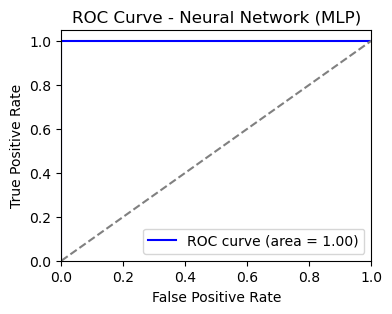

In [29]:
# Define the Neural Network (MLP) model
mlp_model = MLPClassifier(random_state=42)

# Define hyperparameters
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# GridSearchCV for tuning
mlp_grid = GridSearchCV(estimator=mlp_model, param_grid=mlp_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
mlp_grid.fit(X_train, y_train)

# Best model evaluation
best_mlp_model = mlp_grid.best_estimator_
mlp_predictions = best_mlp_model.predict(X_test)
mlp_proba = best_mlp_model.predict_proba(X_test)[:, 1]

# Metrics
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_proba)
mlp_log_loss = log_loss(y_test, mlp_proba)
mlp_mcc = matthews_corrcoef(y_test, mlp_predictions)
mlp_specificity = recall_score(y_test, mlp_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, mlp_predictions)

# Classification report
mlp_class_report = classification_report(y_test, mlp_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, mlp_proba)
roc_auc = auc(fpr, tpr)


# Output metrics
print(f"MLP Accuracy: {mlp_accuracy:.2f}")
print(f"MLP ROC-AUC: {mlp_roc_auc:.2f}")
print(f"MLP Log Loss: {mlp_log_loss:.2f}")
print(f"MLP MCC: {mlp_mcc:.2f}")
print(f"MLP Specificity: {mlp_specificity:.2f}")
print("MLP Confusion Matrix:\n", conf_matrix)
print("MLP Classification Report:\n", mlp_class_report)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (MLP)')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Multi-layer Perceptron (MLP):

1. **hidden_layer_sizes**: Specifies the number of neurons in each hidden layer. For example, `(50,)` means one hidden layer with 50 neurons, and `(50, 50)` means two hidden layers, each with 50 neurons.

2. **activation**: The activation function used in the hidden layers. 
   - **'relu'**: Rectified Linear Unit, commonly used in deep learning for better performance.
   - **'tanh'**: Hyperbolic tangent function, typically used for problems requiring more complex transformations.

3. **solver**: The algorithm for optimization.
   - **'adam'**: Adaptive moment estimation, an efficient optimization algorithm often used for training deep learning models.
   - **'sgd'**: Stochastic gradient descent, a basic optimization algorithm.

4. **learning_rate_init**: The initial learning rate used by the optimizer. It determines how much to change the model's weights with respect to the gradient; lower values can make training slower but more stable.


## Gradient Boosting

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting Accuracy: 0.99
Gradient Boosting ROC-AUC: 0.99
Gradient Boosting Log Loss: 0.07
Gradient Boosting MCC: 0.98
Gradient Boosting Specificity: 1.00
Gradient Boosting Confusion Matrix:
 [[40  0]
 [ 1 63]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



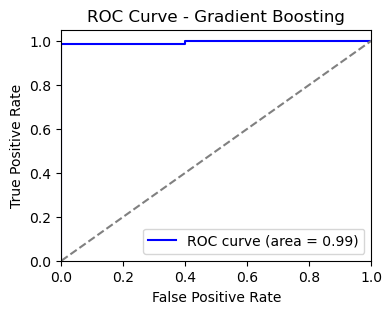

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameters
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for tuning
gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
gb_grid.fit(X_train, y_train)

# Best model evaluation
best_gb_model = gb_grid.best_estimator_
gb_predictions = best_gb_model.predict(X_test)
gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

# Metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_roc_auc = roc_auc_score(y_test, gb_proba)
gb_log_loss = log_loss(y_test, gb_proba)
gb_mcc = matthews_corrcoef(y_test, gb_predictions)
gb_specificity = recall_score(y_test, gb_predictions, pos_label=0)
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Classification report
gb_class_report = classification_report(y_test, gb_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_proba)
roc_auc = auc(fpr, tpr)


# Output metrics
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"Gradient Boosting ROC-AUC: {gb_roc_auc:.2f}")
print(f"Gradient Boosting Log Loss: {gb_log_loss:.2f}")
print(f"Gradient Boosting MCC: {gb_mcc:.2f}")
print(f"Gradient Boosting Specificity: {gb_specificity:.2f}")
print("Gradient Boosting Confusion Matrix:\n", conf_matrix)
print("Gradient Boosting Classification Report:\n", gb_class_report)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


### Hyperparameters used in Gradient Boosting (GB):

1. **n_estimators**: The number of boosting stages (trees) to be used in the ensemble model. More estimators usually improve model performance but increase computation time.

2. **learning_rate**: The rate at which the model is updated during training. A smaller learning rate makes the training process slower but can lead to better generalization.

3. **max_depth**: The maximum depth of the individual decision trees. A deeper tree can capture more complex patterns but may lead to overfitting.


## ExtraTreesClassifier

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Extra Trees Accuracy: 0.99
Extra Trees ROC-AUC: 1.00
Extra Trees Log Loss: 0.06
Extra Trees MCC: 0.98
Extra Trees Specificity: 0.97
Extra Trees Confusion Matrix:
 [[39  1]
 [ 0 64]]
Extra Trees Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



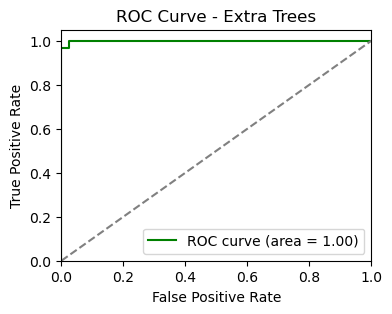

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, log_loss, matthews_corrcoef,
    recall_score, confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt

# Define the Extra Trees model
et_model = ExtraTreesClassifier(random_state=42)

# Define hyperparameters
et_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for tuning
et_grid = GridSearchCV(estimator=et_model, param_grid=et_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
et_grid.fit(X_train, y_train)

# Best model evaluation
best_et_model = et_grid.best_estimator_
et_predictions = best_et_model.predict(X_test)
et_proba = best_et_model.predict_proba(X_test)[:, 1]

# Metrics
et_accuracy = accuracy_score(y_test, et_predictions)
et_roc_auc = roc_auc_score(y_test, et_proba)
et_log_loss = log_loss(y_test, et_proba)
et_mcc = matthews_corrcoef(y_test, et_predictions)
et_specificity = recall_score(y_test, et_predictions, pos_label=0)
et_conf_matrix = confusion_matrix(y_test, et_predictions)

# Classification report
et_class_report = classification_report(y_test, et_predictions)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, et_proba)
roc_auc = auc(fpr, tpr)

# Output metrics
print(f"Extra Trees Accuracy: {et_accuracy:.2f}")
print(f"Extra Trees ROC-AUC: {et_roc_auc:.2f}")
print(f"Extra Trees Log Loss: {et_log_loss:.2f}")
print(f"Extra Trees MCC: {et_mcc:.2f}")
print(f"Extra Trees Specificity: {et_specificity:.2f}")
print("Extra Trees Confusion Matrix:\n", et_conf_matrix)
print("Extra Trees Classification Report:\n", et_class_report)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees')
plt.legend(loc='lower right')
plt.show()


## Matrics Comparison

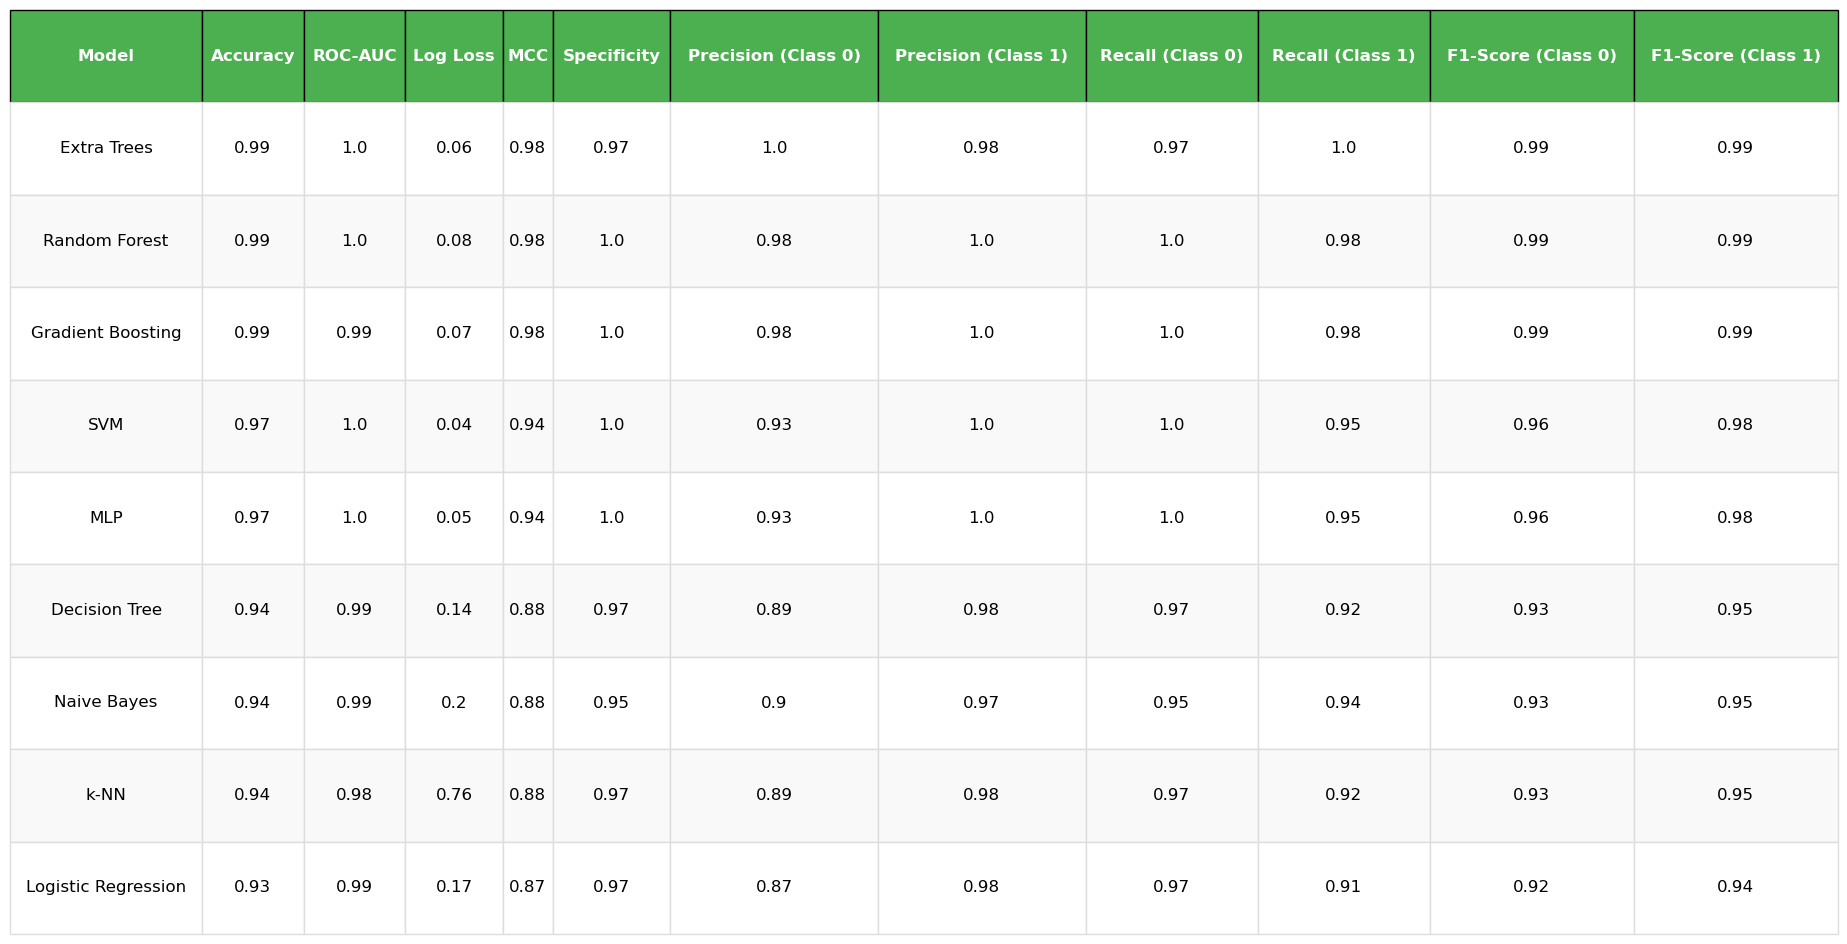

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
     "Model": [
        "Logistic Regression", "SVM", "Naive Bayes", "k-NN", "Decision Tree", 
        "Random Forest", "MLP", "Gradient Boosting" , "Extra Trees"
    ],
    "Accuracy": [0.93, 0.97, 0.94, 0.94, 0.94, 0.99, 0.97, 0.99, 0.99],
    "ROC-AUC": [0.99, 1.00, 0.99, 0.98, 0.99, 1.00, 1.00, 0.99, 1.00],
    "Log Loss": [0.17, 0.04, 0.20, 0.76, 0.14, 0.08, 0.05, 0.07, 0.06],
    "MCC": [0.87, 0.94, 0.88, 0.88, 0.88, 0.98, 0.94, 0.98, 0.98],
    "Specificity": [0.97, 1.00, 0.95, 0.97, 0.97, 1.00, 1.00, 1.00, 0.97],
    "Precision (Class 0)": [0.87, 0.93, 0.90, 0.89, 0.89, 0.98, 0.93, 0.98, 1.00 ],
    "Precision (Class 1)": [0.98, 1.00, 0.97, 0.98, 0.98, 1.00, 1.00, 1.00, 0.98],
    "Recall (Class 0)": [0.97, 1.00, 0.95, 0.97, 0.97, 1.00, 1.00, 1.00, 0.97],
    "Recall (Class 1)": [0.91, 0.95, 0.94, 0.92, 0.92, 0.98, 0.95, 0.98, 1.00],
    "F1-Score (Class 0)": [0.92, 0.96, 0.93, 0.93, 0.93, 0.99, 0.96, 0.99, 0.99],
    "F1-Score (Class 1)": [0.94, 0.98, 0.95, 0.95, 0.95, 0.99, 0.98, 0.99, 0.99]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame based on multiple columns
# First, by Accuracy (descending), then ROC-AUC, and so on. Adjust order as needed.
df_sorted = df.sort_values(by=['Accuracy', 'ROC-AUC', 'MCC', 'F1-Score (Class 1)', 'Log Loss'], 
                           ascending=[False, False, False, False, True])

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figure size for a proper aspect ratio
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(cellText=df_sorted.values, colLabels=df_sorted.columns, loc='center', cellLoc='center',
                 colColours=['#4CAF50'] * len(df_sorted.columns))

# Style the table
font_size = 12  # Set font size for text
table.auto_set_font_size(False)
table.set_fontsize(font_size)

# Adjust column widths and calculate cell height for proportionality
table.auto_set_column_width([i for i in range(len(df_sorted.columns))])
cell_height = 1.2 * font_size / 72  # Slightly larger height than font size for readability

# Apply cell height and background colors
for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4CAF50')
        cell.set_height(cell_height)
    else:  # Body rows
        cell.set_facecolor('#f9f9f9' if row % 2 == 0 else '#ffffff')
        cell.set_edgecolor('#dddddd')
        cell.set_height(cell_height)

# Save the table as an image
plt.savefig('model_comparison_table_sorted_multiple_criteria.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


## Confusion Matrices of all models

c:\Users\2004a\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


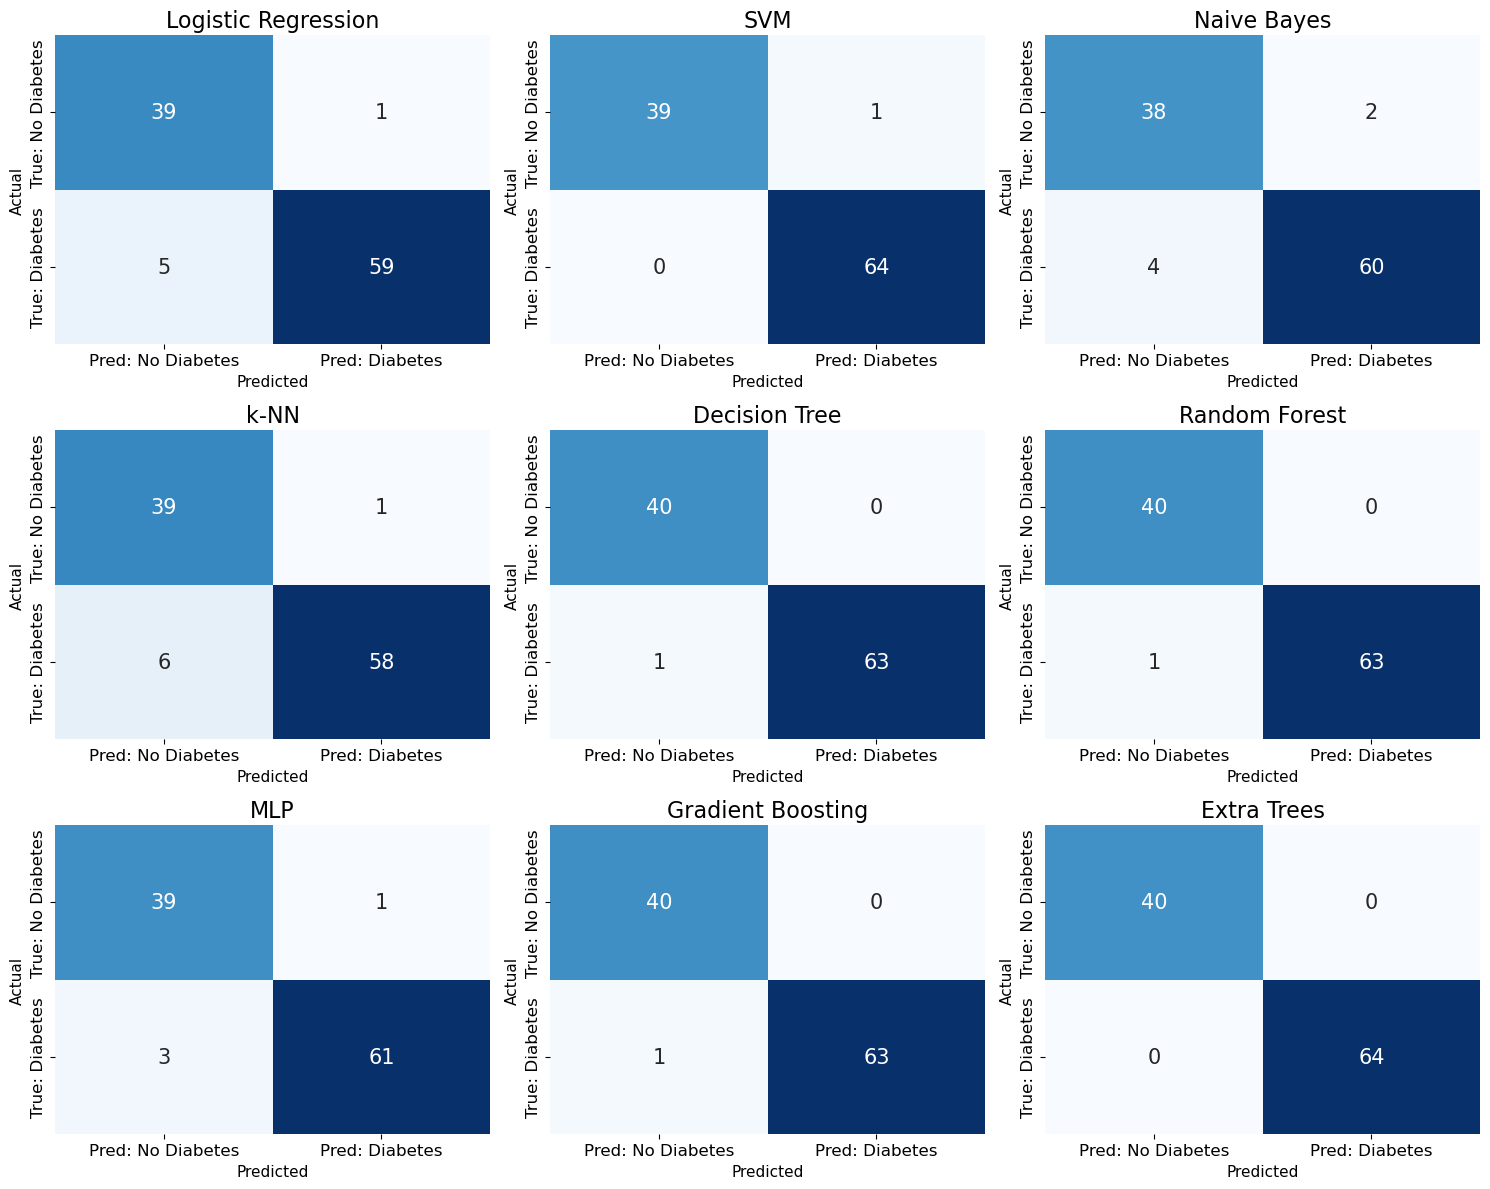

In [50]:
# Import the necessary module for Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# Train and make predictions with each model, including Extra Trees
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Train and make predictions with the Extra Trees model
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)

# Create confusion matrices for each model, including Extra Trees
conf_matrices = {
    "Logistic Regression": confusion_matrix(y_test, logistic_predictions),
    "SVM": confusion_matrix(y_test, svm_predictions),
    "Naive Bayes": confusion_matrix(y_test, nb_predictions),
    "k-NN": confusion_matrix(y_test, knn_predictions),
    "Decision Tree": confusion_matrix(y_test, dt_predictions),
    "Random Forest": confusion_matrix(y_test, rf_predictions),
    "MLP": confusion_matrix(y_test, mlp_predictions),
    "Gradient Boosting": confusion_matrix(y_test, gb_predictions),
    "Extra Trees": confusion_matrix(y_test, et_predictions),  # Added Extra Trees
}

# Plot confusion matrices in one column with increased space between them
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjusted figsize for better spacing and readability

for i, (model_name, cm) in enumerate(conf_matrices.items()):
    ax = axes[i // 3, i % 3]  # 3 rows, 3 columns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, 
                xticklabels=['Pred: No Diabetes', 'Pred: Diabetes'], 
                yticklabels=['True: No Diabetes', 'True: Diabetes'],
                annot_kws={"size": 15})  # Increase font size in the heatmap cells
    ax.set_title(f'{model_name}', fontsize=16)  # Increase title font size
    ax.set_xlabel('Predicted', fontsize=11)  # Increase x-axis label font size
    ax.set_ylabel('Actual', fontsize=11)  # Increase y-axis label font size

    # Increase font size of tick labels
    ax.tick_params(axis='both', labelsize=12)

# Adjust layout for spacing and show plot
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increased space between subplots in both directions
plt.tight_layout()
plt.show()


## Performance Heatmap

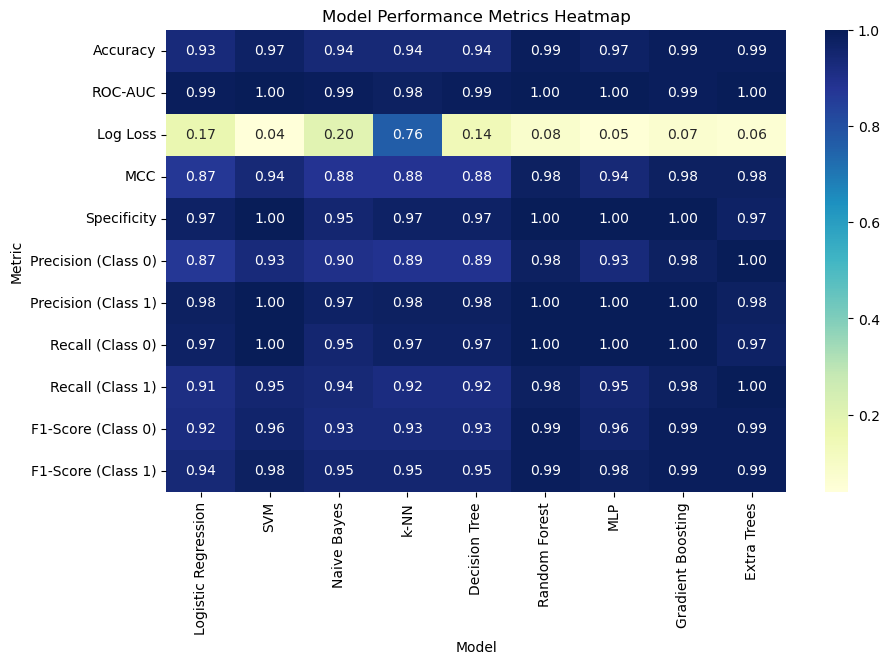

In [51]:
import seaborn as sns

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index("Model").T, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Metric")
plt.xlabel("Model")
plt.show()


## Final Comparison and Conclusion

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


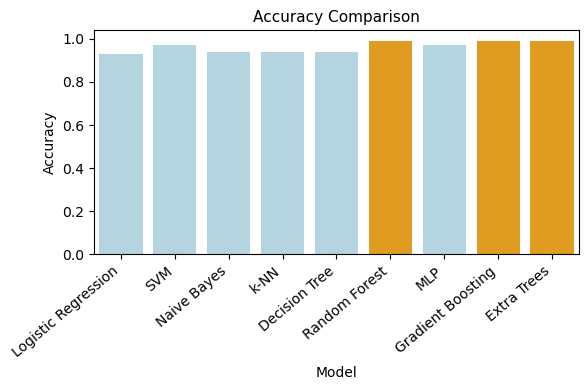

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


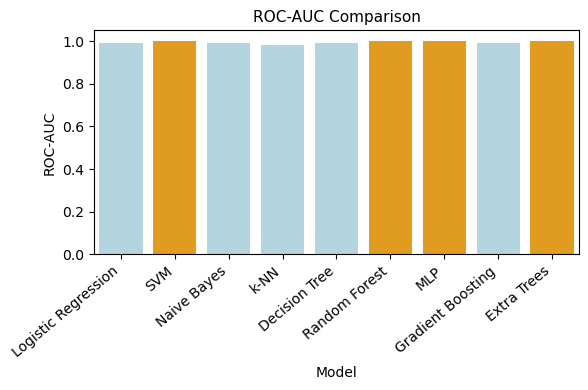

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


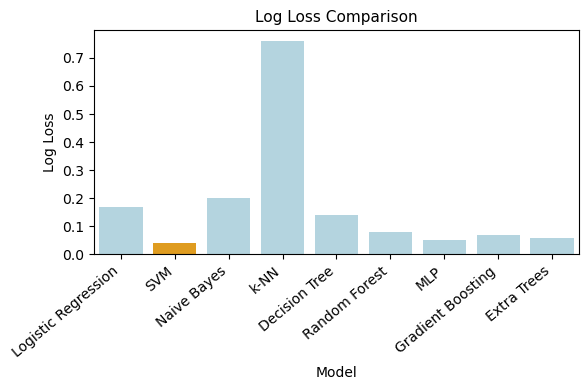

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


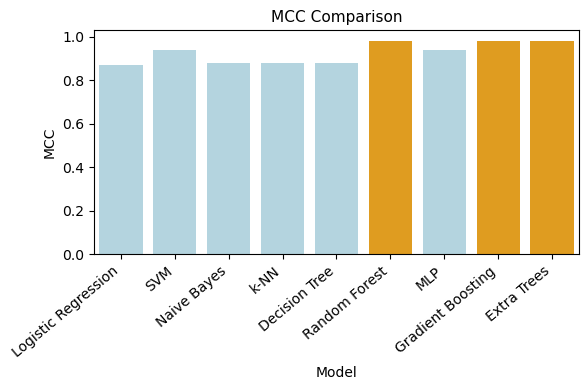

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


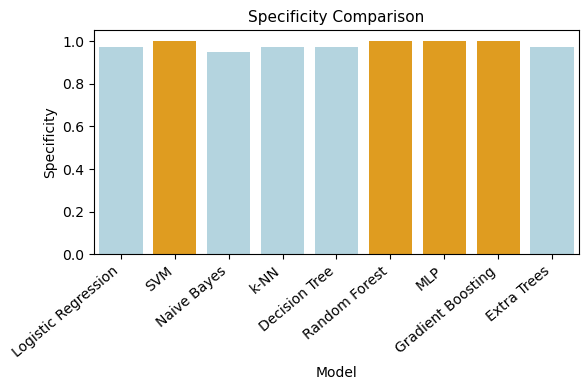

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


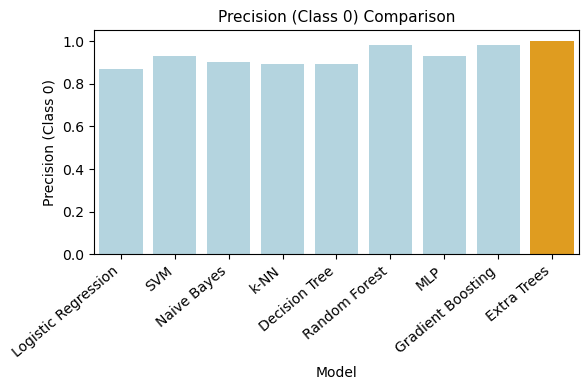

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


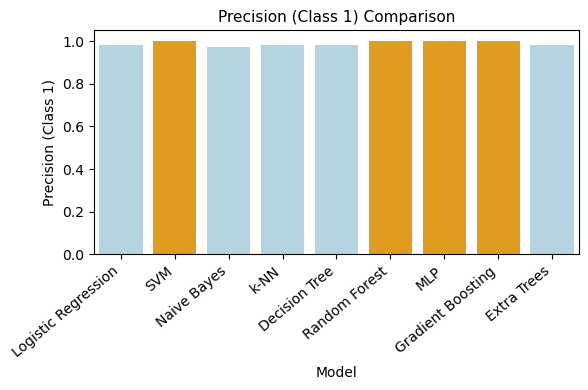

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


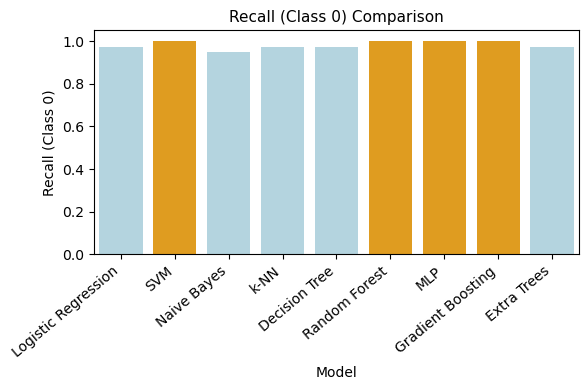

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


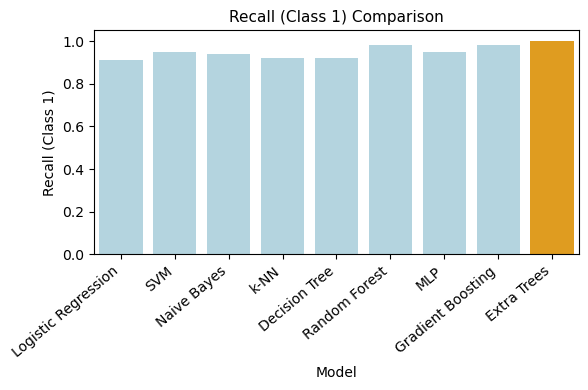

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


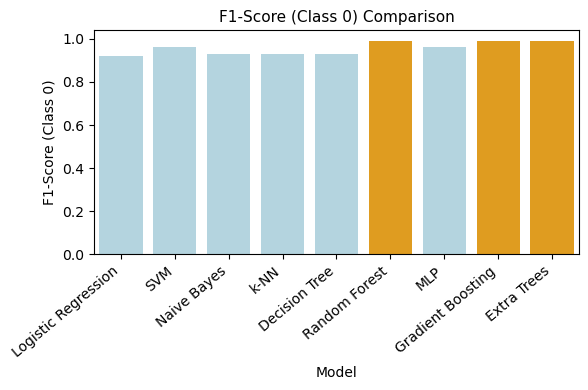

C:\Users\2004a\AppData\Local\Temp\ipykernel_14616\471087084.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette=colors)


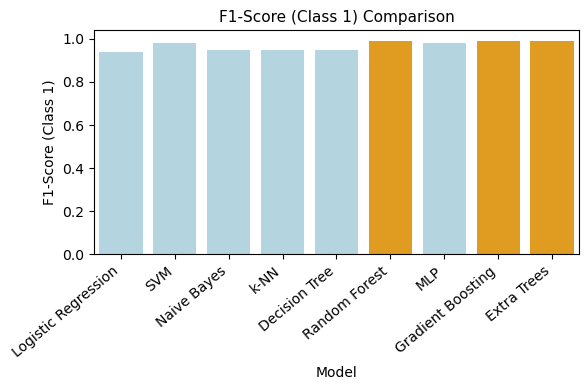

Based on all metrics, **Random Forest** performs the best overall due to its consistently high scores.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
     "Model": [
        "Logistic Regression", "SVM", "Naive Bayes", "k-NN", "Decision Tree", 
        "Random Forest", "MLP", "Gradient Boosting" , "Extra Trees"
    ],
    "Accuracy": [0.93, 0.97, 0.94, 0.94, 0.94, 0.99, 0.97, 0.99, 0.99],
    "ROC-AUC": [0.99, 1.00, 0.99, 0.98, 0.99, 1.00, 1.00, 0.99, 1.00],
    "Log Loss": [0.17, 0.04, 0.20, 0.76, 0.14, 0.08, 0.05, 0.07, 0.06],
    "MCC": [0.87, 0.94, 0.88, 0.88, 0.88, 0.98, 0.94, 0.98, 0.98],
    "Specificity": [0.97, 1.00, 0.95, 0.97, 0.97, 1.00, 1.00, 1.00, 0.97],
    "Precision (Class 0)": [0.87, 0.93, 0.90, 0.89, 0.89, 0.98, 0.93, 0.98, 1.00 ],
    "Precision (Class 1)": [0.98, 1.00, 0.97, 0.98, 0.98, 1.00, 1.00, 1.00, 0.98],
    "Recall (Class 0)": [0.97, 1.00, 0.95, 0.97, 0.97, 1.00, 1.00, 1.00, 0.97],
    "Recall (Class 1)": [0.91, 0.95, 0.94, 0.92, 0.92, 0.98, 0.95, 0.98, 1.00],
    "F1-Score (Class 0)": [0.92, 0.96, 0.93, 0.93, 0.93, 0.99, 0.96, 0.99, 0.99],
    "F1-Score (Class 1)": [0.94, 0.98, 0.95, 0.95, 0.95, 0.99, 0.98, 0.99, 0.99]
    
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# List of metrics for plotting
metrics = ["Accuracy", "ROC-AUC", "Log Loss", "MCC", "Specificity", "Precision (Class 0)", "Precision (Class 1)",
           "Recall (Class 0)", "Recall (Class 1)", "F1-Score (Class 0)", "F1-Score (Class 1)"]

# Create individual plots for each metric
for metric in metrics:
    plt.figure(figsize=(6, 4))
    
    # Handle Log Loss separately since lower values are better
    if metric == "Log Loss":
        # Find the model with the lowest value for Log Loss
        best_model = df[df[metric] == df[metric].min()]["Model"].values
        # Create a list of colors where the best model is highlighted (low log loss is better)
        colors = ['orange' if model in best_model else 'lightblue' for model in df["Model"]]
    else:
        # Find the model with the highest value for other metrics
        best_model = df[df[metric] == df[metric].max()]["Model"].values
        # Create a list of colors where all models with the highest score are highlighted
        colors = ['orange' if model in best_model else 'lightblue' for model in df["Model"]]
    
    # Create the bar plot
    sns.barplot(x="Model", y=metric, data=df, palette=colors)
    
    # Title and labels
    plt.title(f"{metric} Comparison", fontsize=11)
    plt.xticks(rotation=40, ha='right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Final conclusion message
print("Based on all metrics, **Random Forest** performs the best overall due to its consistently high scores.")


## Random Forest is likely the best fit for  data because:

1. It handles both numerical and categorical features well.
2. It can model non-linear relationships between features.
3. It is robust to outliers and noise.
4. It performs well with imbalanced datasets.
5. It reduces the risk of overfitting through ensemble learning.
6. It provides feature importance, which can be useful for understanding your data.